# Scikit-Learn Exercise 2 - Evaluation

In this exercise you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

# ignore warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    #your code here
    df = pd.read_csv('fraud_data.csv')
    return df.Class.loc[df.Class == 1].count() / len(df.Class)
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    #your code here
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score
    dummy = DummyClassifier(strategy='most_frequent')
    dummy.fit(X_train, y_train)
    y_pred = dummy.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return (accuracy, recall)
    
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    #your code here
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return (accuracy, recall, precision)
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    #your code here
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    svc = SVC(C=1e9, gamma=1e-07)
    svc.fit(X_train, y_train)
    y_pred = svc.decision_function(X_test)
    # https://stackoverflow.com/questions/41864083/how-to-set-a-threshold-for-a-sklearn-classifier-based-on-roc-results
    y_pred = np.where(y_pred > -220, 1, 0)
    
    return confusion_matrix(y_test, y_pred)
    
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

[0.01474926 0.96923077 1.        ]


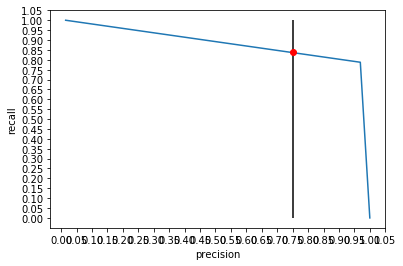

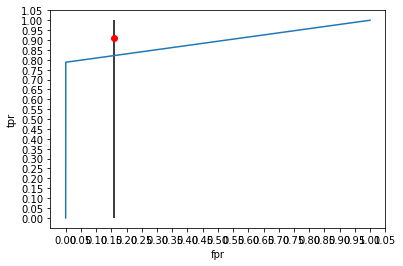

(0.84, 0.91)

In [7]:
def answer_five():
    #your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    logistic_model = LogisticRegression().fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    print(precision)
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.plot(precision, recall)
    plt.xlabel('precision')
    plt.ylabel('recall')
    plt.vlines(0.75, 0, 1)
    plt.plot(0.75,.84,'ro') # trial and error
    plt.xticks(np.arange(0,1.1,0.05))
    plt.yticks(np.arange(0,1.1,0.05))
    plt.show()
    
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.vlines(0.16, 0, 1)
    plt.plot(0.16,.91,'ro') # trial and error
    plt.xticks(np.arange(0,1.1,0.05))
    plt.yticks(np.arange(0,1.1,0.05))
    plt.show()
    
    return (0.84, 0.91)
    
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [8]:
def answer_six():    
    #your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    
    # ty docs https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    gscv = GridSearchCV(LogisticRegression(), 
                        param_grid={'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}, scoring='recall')
    gscv.fit(X_train, y_train)
    return gscv.cv_results_['mean_test_score'].reshape(5,2)

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

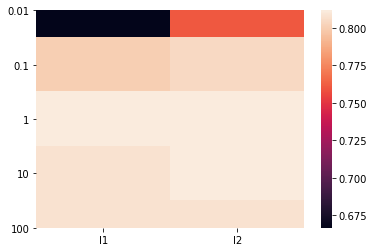

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())